# To predict whether someone is likely to default their credit card

Using UCI Default of credit cards clients dataset

## Import the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.utils import resample # downsample the dataset
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import scale # scale and center the data
from sklearn.svm import SVC
from sklearn.decomposition import PCA

In [2]:
df=pd.read_csv('default of credit card clients.csv',
               header=1,#there are two types of column names, skip the first row of column names to use the second one as column names
               sep=',')

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Data Description

ID: A unique ID that identifies each customer.

LIMIT_BAL: Amount of the given credit. (Integer) 

SEX: Gender (1 = male; 2 = female).

EDUCATION: Level of education(1 = graduate school; 2 = university; 3 = high school; 4 = others).

MARRIAGE: Marital status (1 = married; 2 = single; 3 = others).

AGE: Age. (Integer)

PAY_(0,2,3,4,5,6): When the bills were paid from April to September, 2005.
( -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.)

BILL_AMT(1-6):  Amount of bill to be paid from September to April, 2005. (Integer)

PAY_AMT(1-6): Amount of bill paid from September to April, 2005. (Integer)

default payment next month: YES - 1, NO - 0



In [4]:
df.rename({'default payment next month': 'DEFAULT'},
axis='columns',inplace=True)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


The ID column were randomly assigned, making it uniformative, so we drop it.

In [5]:
df.drop('ID',axis=1,inplace=True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Missing Data Part-1 : Identifying missing data

In [6]:
df.dtypes

LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
DEFAULT      int64
dtype: object

Every column is int64, this tells us that there are no mixed letters and numbers.In other words, there are no NA values, or other character based place holders for missing data.

Still we should make sure column column contains acceptable values.

In [7]:
df['PAY_0'].unique()


array([ 2, -1,  0, -2,  1,  3,  4,  8,  7,  5,  6], dtype=int64)

In [8]:
df['SEX'].unique()

array([2, 1], dtype=int64)

Ideally check for every variable

In [9]:
df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

For reasons unknown, in addition to the allowed values, 0,5,6 is also present in EDUCATION.

In [10]:
df['MARRIAGE'].unique()

array([1, 2, 3, 0], dtype=int64)

Similarly MARRIAGE also contains 0 in it.

Here we will consider 0 as possible missing values.  

## Missing Data Part-2 : Dealing with missing data

In [11]:
len(df.loc[(df['EDUCATION']==0) | (df['MARRIAGE']==0)])

68

Since 68 of the 30k is less than 1%, we will remove these values.

In [12]:
df_no_missing=df.loc[(df['EDUCATION']!=0) & (df['MARRIAGE']!=0)]

In [13]:
len(df_no_missing)

29932

## Downsample the data

Support Vector Machines are great with small dataset, but not with large ones. While this dataset is not huge, it is big enough to take a long time to optimse with cross validation. So we'll downsample both categories, customers who did and didnt default, down to 2k.

In [14]:
len(df_no_missing.loc[(df['DEFAULT']==0)])

23301

In [15]:
len(df_no_missing.loc[(df['DEFAULT']==1)])


6631

In [16]:
df_no_default=df_no_missing.loc[(df['DEFAULT']==0)]
df_no_default.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0


In [17]:
df_default=df_no_missing.loc[(df['DEFAULT']==1)]
df_default.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
13,70000,1,2,2,30,1,2,2,0,0,...,66782,36137,36894,3200,0,3000,3000,1500,0,1
16,20000,1,1,2,24,0,0,2,2,2,...,18338,17905,19104,3200,0,1500,0,1650,0,1
21,120000,2,2,1,39,-1,-1,-1,-1,-1,...,0,632,316,316,316,0,632,316,0,1


In [18]:
df_no_default_downsampled=resample(df_no_default,replace=False,n_samples=1000,random_state=42)

In [19]:
df_default_downsampled=resample(df_default,replace=False,n_samples=1000,random_state=42)

In [20]:
df_downsampled=pd.concat([df_no_default_downsampled,df_default_downsampled])

## Format Data Part-1 : Split data into Dependent and independent variables

In [21]:
X=df_downsampled.drop('DEFAULT',axis=1).copy()
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
641,130000,2,3,1,28,0,0,0,0,-2,...,50000,0,0,0,2500,1000,0,0,0,0
4678,170000,1,3,1,29,0,0,0,0,0,...,172307,35234,32869,33862,7200,7500,1200,1200,1500,1300
16004,180000,2,2,1,29,0,0,0,0,0,...,26310,26662,26166,26176,1800,1800,1500,1056,950,1000
22974,210000,2,2,2,32,-2,-2,-2,-2,-2,...,410,0,0,0,979,412,0,0,0,0
17535,190000,2,3,1,45,0,0,0,0,0,...,80548,81778,83082,84811,3300,3331,3359,2663,2751,3000


In [22]:
y=df_downsampled['DEFAULT'].copy()
y.head()

641      0
4678     0
16004    0
22974    0
17535    0
Name: DEFAULT, dtype: int64

In [23]:
y.unique()

array([0, 1], dtype=int64)

## Format Data Part-2 : One-Hot Encoding

Let's convert categorical data to continuous data using one hot encoding. SEX,EDUCATION, MARRIAGE and PAY_ needs to be one hot encoded.

In [24]:
X_encoded=pd.get_dummies(X,columns=['SEX',
                                    'EDUCATION',
                                    'MARRIAGE',
                                    'PAY_0',
                                    'PAY_2',
                                    'PAY_3',
                                    'PAY_4',
                                    'PAY_5',
                                    'PAY_6'],dtype='int64')
X_encoded.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_7,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
641,130000,28,100143,50456,50000,0,0,0,2500,1000,...,0,1,0,0,0,0,0,0,0,0
4678,170000,29,165027,168990,172307,35234,32869,33862,7200,7500,...,0,0,0,1,0,0,0,0,0,0
16004,180000,29,25781,26000,26310,26662,26166,26176,1800,1800,...,0,0,0,1,0,0,0,0,0,0
22974,210000,32,355,975,410,0,0,0,979,412,...,0,1,0,0,0,0,0,0,0,0
17535,190000,45,76433,78472,80548,81778,83082,84811,3300,3331,...,0,0,0,1,0,0,0,0,0,0


## Format Data Part-3: Centering and Scaling

The radial basis function that we are using with our Support Vector machine assumes that the data are centered and scaled,i.e, each column should have a mean value = 0 and a standard deviation = 1.

We split the data into training and testing datasets and then scale them separately to avoid Data Leakage. Data Leakage occurs when information about the training dataset corrupts or influences the testing dataset.

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X_encoded,y,random_state=42)
X_train_scaled=scale(X_train)
X_test_scaled=scale(X_test)

## Build a Preliminary Support Vector Machine

In [26]:
clf_svm=SVC(random_state=42)
clf_svm.fit(X_train_scaled,y_train)

SVC(random_state=42)

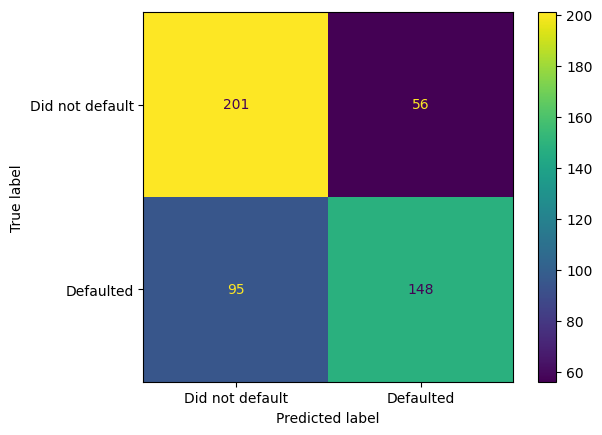

In [28]:
ConfusionMatrixDisplay.from_estimator(
    clf_svm, X_test_scaled, y_test,display_labels=['Did not default','Defaulted'])

Out of the 257 people that did not default, 201 (79%) were correctly classified. And of the 243 people that defaulted, 148 (61%) were correctly classified. Therefore the predicitons are not great, so we will try to improve the predictions using cross validation.

## Optimize Parameters using GridSearchCV

Grid search cross-validation is a technique that searches for the optimal hyperparameters of a model by evaluating the model's performance on different combinations of hyperparameter values. The idea is to define a set of hyperparameters and a range of values for each hyperparameter, and then search for the optimal combination of hyperparameters that produces the best performance on a validation set. This process is called a grid search because it searches over a grid of hyperparameters.

In [29]:
param_grid1={
    'C':[0.1,0.5,1,10,100],
    'gamma':['scale',1,0.1,0.01,0.001,0.0001],
    'kernel':['rbf']
}

In [30]:
optimal_params=GridSearchCV(SVC(),param_grid1,cv=5,scoring='accuracy',verbose=3)
optimal_params.fit(X_train_scaled,y_train)
optimal_params.best_params_

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.653 total time=   0.7s
[CV 2/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.690 total time=   0.4s
[CV 3/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.673 total time=   0.4s
[CV 4/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.677 total time=   0.4s
[CV 5/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.713 total time=   0.4s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.507 total time=   0.5s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.507 total time=   0.5s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.503 total time=   0.4s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.503 total time=   0.4s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.503 total time=   0.5s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.593 total time=   0.4s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

## Building, evaluating and drawing the optimized Support Vector Machine

In [31]:
clf=SVC(random_state=42,C=100,gamma=0.001)
clf.fit(X_train_scaled,y_train)

SVC(C=100, gamma=0.001, random_state=42)

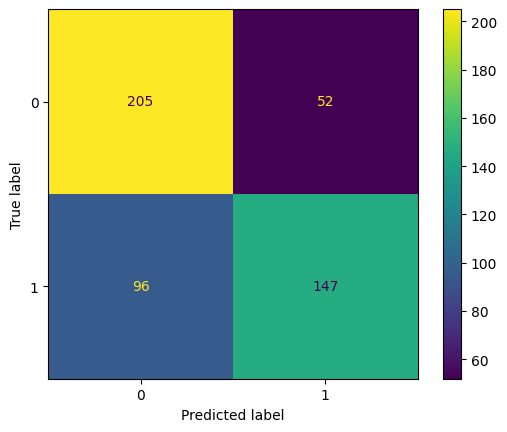

In [32]:
ConfusionMatrixDisplay.from_estimator(
    clf, X_test_scaled, y_test)

The optimized model does a little bit better than before. 4 more people were correctly classified as not defaulting and 1 more person was incorrectly classified as defaulting.
